In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime as dt
import yfinance as yf

In [4]:
start=dt.datetime(2010,1,1)
end=dt.datetime(2024,5,4)

data=yf.download('TCS.BO',start,end)

data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,375.350006,378.950012,374.000000,375.850006,235.607605,205618
2010-01-05,378.125000,379.899994,373.049988,375.450012,235.356659,361778
2010-01-06,376.450012,376.500000,365.000000,366.899994,229.997070,568174
2010-01-07,366.500000,367.899994,355.500000,357.325012,223.994873,843042
2010-01-08,350.000000,358.000000,348.299988,350.250000,219.559799,899818


In [28]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3511,2024-04-26,3859.649902,3875.850098,3801.250000,3812.850098,3776.563232,114191
3512,2024-04-29,3825.600098,3877.699951,3820.000000,3870.600098,3833.763672,22303
3513,2024-04-30,3870.600098,3880.000000,3810.000000,3822.600098,3786.220703,98711
3514,2024-05-02,3800.000000,3870.199951,3782.500000,3863.750000,3826.978760,76798
3515,2024-05-03,3881.649902,3893.300049,3798.050049,3839.350098,3802.811279,149072


In [29]:
data=data.reset_index()
data.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-01-04,375.350006,378.950012,374.000000,375.850006,235.607605,205618
1,1,2010-01-05,378.125000,379.899994,373.049988,375.450012,235.356659,361778
2,2,2010-01-06,376.450012,376.500000,365.000000,366.899994,229.997070,568174
3,3,2010-01-07,366.500000,367.899994,355.500000,357.325012,223.994873,843042
4,4,2010-01-08,350.000000,358.000000,348.299988,350.250000,219.559799,899818


In [30]:
# data=data.drop(["Date",'Adj Close'],axis=1)
data.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-01-04,375.350006,378.950012,374.000000,375.850006,235.607605,205618
1,1,2010-01-05,378.125000,379.899994,373.049988,375.450012,235.356659,361778
2,2,2010-01-06,376.450012,376.500000,365.000000,366.899994,229.997070,568174
3,3,2010-01-07,366.500000,367.899994,355.500000,357.325012,223.994873,843042
4,4,2010-01-08,350.000000,358.000000,348.299988,350.250000,219.559799,899818


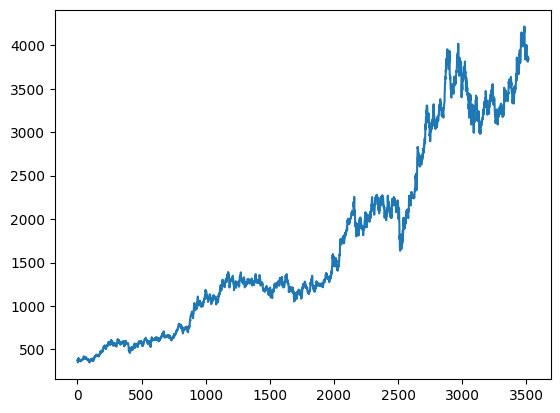

In [31]:
plt.plot(data.Close)

In [32]:
data

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-01-04,375.350006,378.950012,374.000000,375.850006,235.607605,205618
1,1,2010-01-05,378.125000,379.899994,373.049988,375.450012,235.356659,361778
2,2,2010-01-06,376.450012,376.500000,365.000000,366.899994,229.997070,568174
3,3,2010-01-07,366.500000,367.899994,355.500000,357.325012,223.994873,843042
4,4,2010-01-08,350.000000,358.000000,348.299988,350.250000,219.559799,899818
...,...,...,...,...,...,...,...,...
3511,3511,2024-04-26,3859.649902,3875.850098,3801.250000,3812.850098,3776.563232,114191
3512,3512,2024-04-29,3825.600098,3877.699951,3820.000000,3870.600098,3833.763672,22303
3513,3513,2024-04-30,3870.600098,3880.000000,3810.000000,3822.600098,3786.220703,98711
3514,3514,2024-05-02,3800.000000,3870.199951,3782.500000,3863.750000,3826.978760,76798


In [33]:
ma100=data.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3511    3891.343999
3512    3895.345500
3513    3898.440500
3514    3902.144001
3515    3905.441501
Name: Close, Length: 3516, dtype: float64

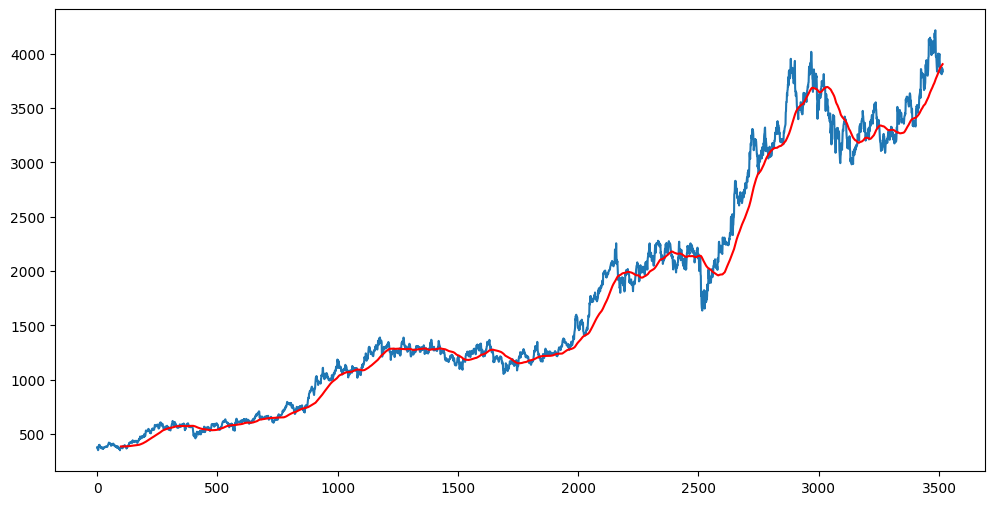

In [34]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')

In [35]:
ma200=data.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3511    3660.299503
3512    3663.433503
3513    3666.287754
3514    3669.525254
3515    3672.845754
Name: Close, Length: 3516, dtype: float64

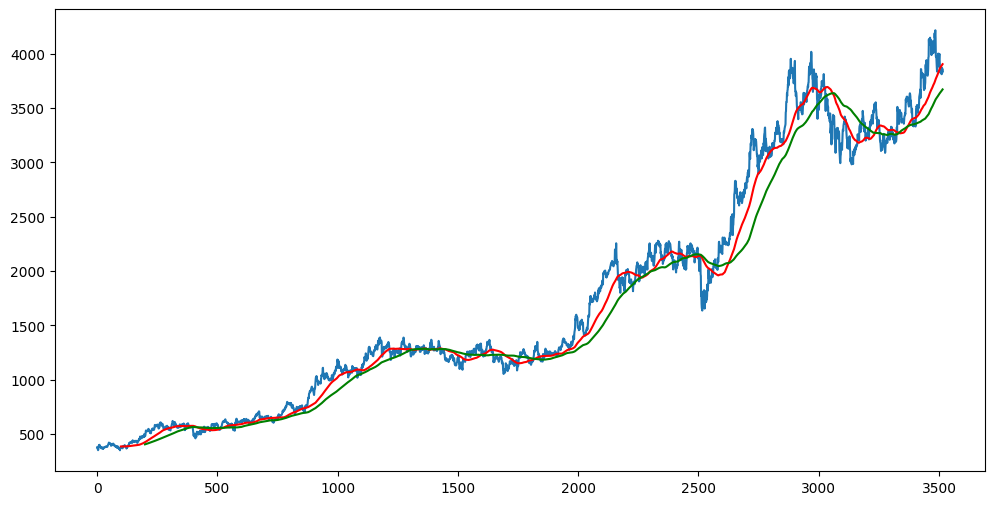

In [36]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')


In [37]:
data.shape

(3516, 8)

In [38]:
# Splitting data into Training and Testing
data_training=pd.DataFrame(data['Close'][0:int(len(data)*0.7)])
data_testing=pd.DataFrame(data['Close'][int(len(data)*0.7):int(len(data))])
print(data_training.shape)
print(data_testing.shape)

(2461, 1)
(1055, 1)


In [39]:
data_training.head()

,Close
0,375.850006
1,375.450012
2,366.899994
3,357.325012
4,350.250000


In [40]:
data_testing.head()

,Close
2461,2161.300049
2462,2169.800049
2463,2157.449951
2464,2200.399902
2465,2200.149902


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [42]:
# pip install scikit-learn

In [43]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01372029],
       [0.01351299],
       [0.00908207],
       ...,
       [0.95960358],
       [0.95810062],
       [0.95019753]])

In [44]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(2361, 100, 1)

In [45]:
# pip install keras
# pip install tensorflow

In [46]:
from keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential

In [47]:
model = Sequential()


model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))



model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))


                  
model.add(Dense(units=1))


C:\Users\muskan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 112ms/step - loss: 0.0093
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0065
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - loss: 0.0048
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.0045
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - loss: 0.0055
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - loss: 0.0037
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - loss: 0.0047
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.0042
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0038
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.0036
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - loss: 0.0037
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - loss: 0.0032
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 0.0031
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - loss: 0.0028
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step -

In [68]:
model.save('keras_model.h5')

In [69]:
data_testing.head()

,Close
2461,2161.300049
2462,2169.800049
2463,2157.449951
2464,2200.399902
2465,2200.149902


In [70]:
data_training.tail(100)

,Close
2361,2205.399902
2362,2179.899902
2363,2206.050049
2364,2248.550049
2365,2215.449951
...,...
2456,2232.449951
2457,2215.050049
2458,2201.050049
2459,2198.149902


In [71]:
past_100_days=data_training.tail(100)
print(type(past_100_days))
print(type(data_testing))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [72]:
final_data = pd.concat([past_100_days, data_testing], ignore_index=True)

In [73]:
final_data.head()

,Close
0,2205.399902
1,2179.899902
2,2206.050049
3,2248.550049
4,2215.449951


In [74]:
input_data = scaler.fit_transform(final_data)
input_data

array([[0.22053921],
       [0.21066085],
       [0.22079107],
       ...,
       [0.84702104],
       [0.86296196],
       [0.85350976]])

In [75]:
input_data.shape

(1155, 1)

In [76]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [77]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1055, 100, 1)
(1055,)


In [78]:
# Making Predictions
y_predicted = model.predict(x_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step


In [79]:
y_predicted.shape

(1055, 1)

In [80]:
y_test

array([0.20345552, 0.2067483 , 0.20196404, ..., 0.84702104, 0.86296196,
       0.85350976])

In [81]:
y_predicted

array([[0.21816733],
       [0.22081226],
       [0.22342779],
       ...,
       [0.8526838 ],
       [0.8507271 ],
       [0.84986424]], dtype=float32)

In [82]:
s=scaler.scale_

In [85]:
# scale_factor =1/0.02123255
scale_factor =1/s
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor


In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label="Original Price")
plt.plot(y_predicted,'r',label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()